<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/New_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Exam - Deep Network Development**



# **Exam Information**

---

- **Name:** *<Enter your name here>*
- **Neptun ID:** *<Enter your Neptun ID here>*
- **Date:** *21/01/2025*
- **Duration:** *9:00 AM – 11:00 AM*
- *Please fill in your details above before starting the exam.*



## **General Rules**

This notebook contains the task to be completed in order to pass the exam and the course. Below are the details:
1. **Implementing a network architecture**, including its **forward pass** function.
2. Additional **optional requirements** for bonus points towards final grade.
3. You have **2 hours** to complete the exam.
4. You may distribute the time as you see fit between the required and optional parts.
5. You are allowed to use any resource including: the internet, AI tools, practice notebooks, and more.
6. **It is strictly prohibited to use any form of communication** (e.g., Teams, WhatsApp, Messenger, etc.). **Violation will result in an immediate FAIL** of the exam.

---

### **Submission Guidelines**
- Submit your solution as a **`.ipynb` file** on **Canvas**.
- To **PASS**, your solution must:
  1. **Satisfy the minimum requirements** (i.e., a working implementation of the network architecture and forward pass).
  2. Be **submitted on time**.
  3. Be prepared to **orally defend your code** after submission.

---

### **Exam Retake Policy**
- If you **FAIL**, you are allowed to do **one retake**.  
- If you **FAIL AGAIN**, sadly, you **fail the course**.  

---

### **Grading**
- If you **PASS**, your final grade will be the **weighted average** of your assignment defenses (theory and code).

---

Good luck, and ensure you follow all the rules!


## **Requirements**

---

### **Minimum Requirements – Sufficient to Pass the Exam**
1. **Implement the layers of the architecture:**  
   Complete the architecture outlined in Section 1 by filling in the missing parts.
2. **Implement the forward function:**  
   Ensure the input and output of the forward function are correctly implemented.  
   
   **Note:** To meet these requirements, your final output must match the expected output.

---

### **Extra Requirements – For Grade Improvement and AI Lab Access**

---

3. **Text Classification with Attention-Based Features:**  
- The goal is to enhance the text classification model by incorporating a Transformer Encoder branch. This additional branch leverages attention mechanisms to capture global dependencies in the input text, complementing the local and sequential features extracted by the CNN and BiLSTM branches.

   ➡️ **Reward: +1 to final grade**

Make sure to carefully follow the instructions provided in each cell to meet the requirements!


## **1. Required: Task Description**

### Task: Implement a Multi-Branch Text Classification Model

Your task is to implement a custom neural network architecture along with its forward pass function.

This task is inspired by multi-branch text classification, where different neural network modules are used to extract and combine diverse features from text. The input is tokenized text, represented as a sequence of integers corresponding to word indices in a vocabulary. These indices are then embedded into dense vectors for processing.

#### Input Representation

For this task, you will work with a multi-branch text classification model. The input tensor will have the shape `(B, T)`, where:

- `B` is the batch size, representing the number of samples in a batch.
- `T` is the sequence length, representing the number of tokens in each input sequence.

#### Model Requirements

Your implemented model will:

1. **Embedding Layer**: Take the input text token tensor and embed it into dense representations of shape `(B, T, E)`, where `E` is the embedding dimension.
2. **Feature Extraction Branches**:
   - A **CNN branch** that applies multiple Conv1D filters of varying kernel sizes to extract local n-gram features.
   - A **BiLSTM branch** that captures sequential dependencies from the text input using a bidirectional LSTM.
3. **Fusion**: Concatenate the outputs from the CNN and BiLSTM branches to form a fused feature representation.
4. **Projection and Classification**:
   - Pass the fused representation through a linear projection layer.
   - Apply a classifier to output logits for `C` classes, where `C` is the number of target classes.

#### Objective

The primary objective is to correctly implement the neural network architecture and its forward pass to achieve the described functionality.

To better view the architecture diagram:  
- **Right-click the image** and select **"Open image in a new tab"** to enable zoom for a clearer view.  
- Alternatively, you can **download the image** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1KHGEhDAIKb7gsIlBcXyDp_zQQREu-Sqm/view?usp=sharing)

---

### Diagram Preview:
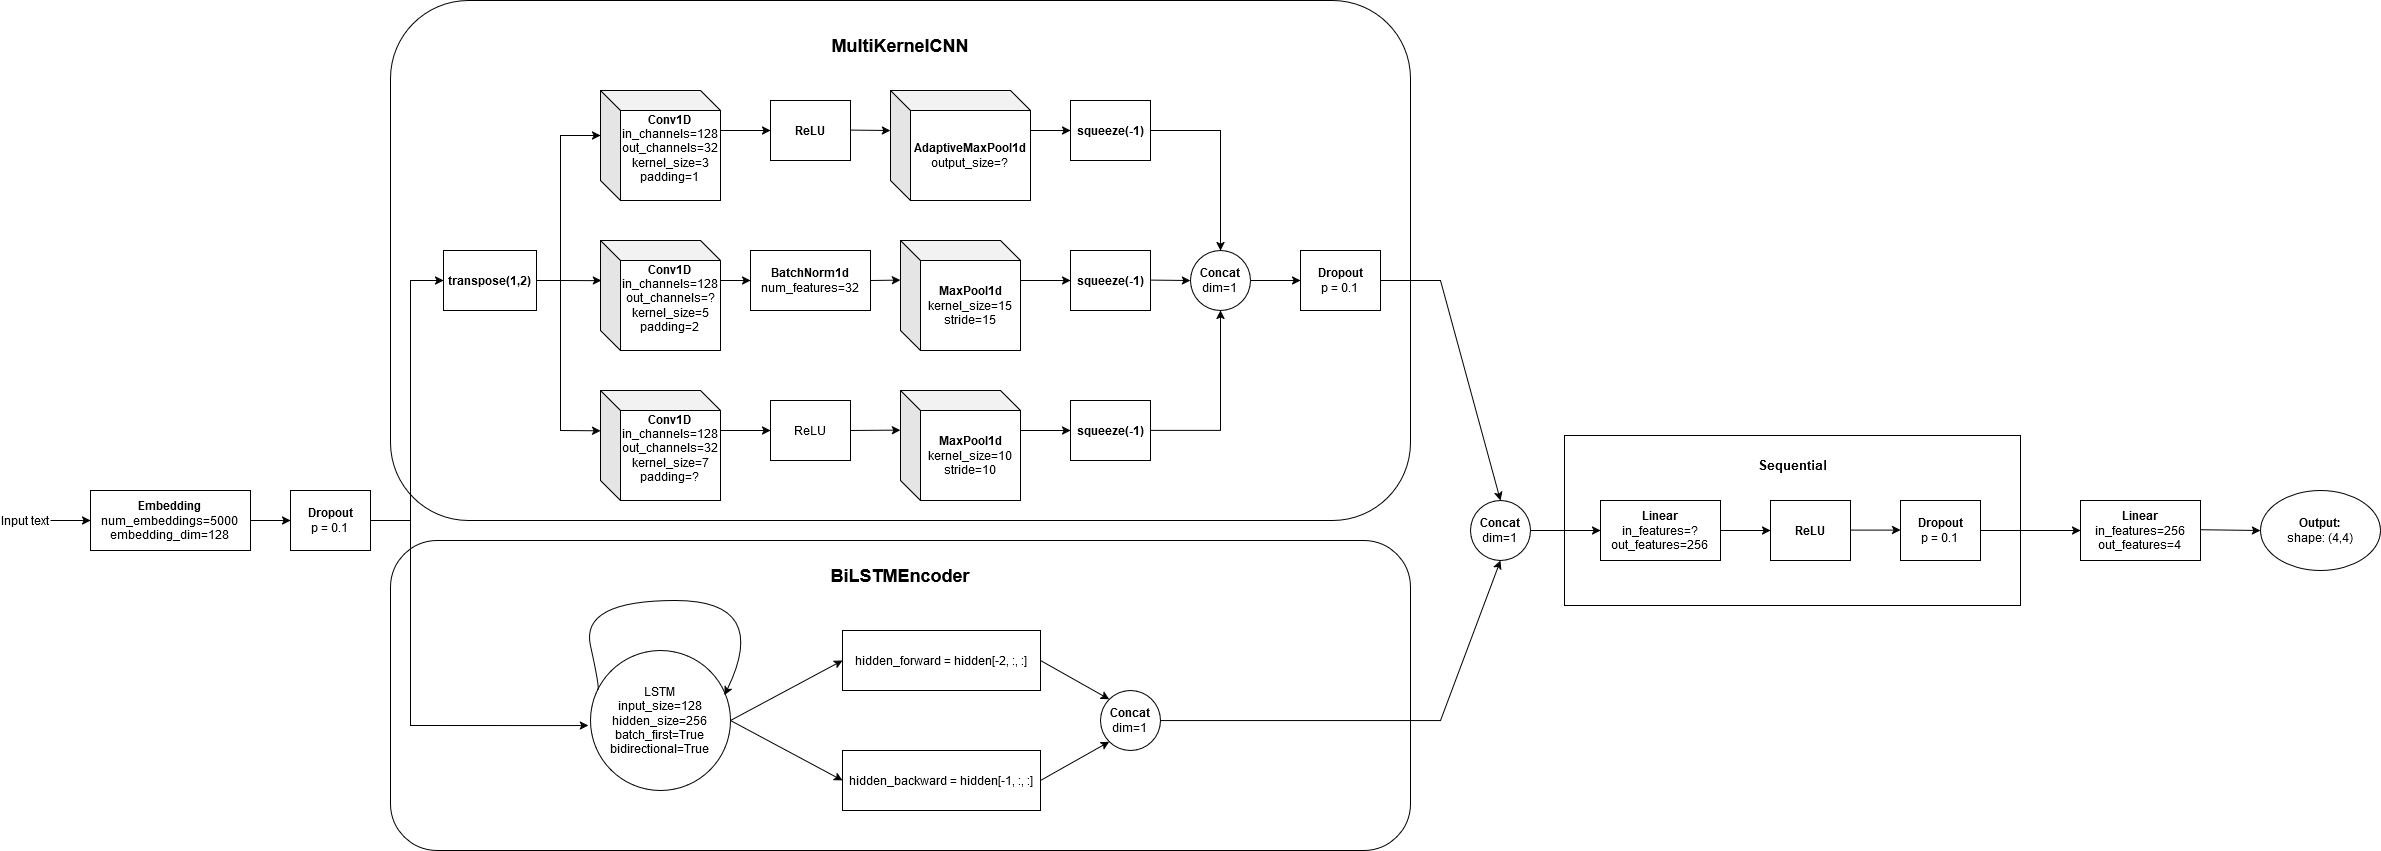

Necessary Imports and Data Loading

In [ ]:
# Cell 0.1
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import random
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Cell 0.2 (GPU is not needed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Input

In [ ]:
# Cell 0.3 -> INPUT (DO NOT EDIT THIS CELL!)
input_tokens =  torch.randint(0, 5000, (4, 20))  # [B=4, T=20]
print(input_tokens.shape)

torch.Size([4, 20])


In [ ]:
embedding=nn.Embedding(num_embeddings=5000, embedding_dim=128)
embedded = embedding(input_tokens)
print(f"After embedding: {embedded.shape}")
dropout = nn.Dropout(0.1)
input_tokens= dropout(embedded)

After embedding: torch.Size([4, 20, 128])


### Architecture

In [ ]:
class MultiKernelCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv1d(in_channels=128, out_channels=32, kernel_size=3, padding=1)
        self.relu=nn.ReLU()
        self.pool1=nn.AdaptiveMaxPool1d(output_size=1) #outputzise
        self.conv2=nn.Conv1d(in_channels=128, out_channels=32, kernel_size=5, padding=2)
        self.batchnorm=nn.BatchNorm1d(num_features=32)
        self.pool2=nn.MaxPool1d(kernel_size=15, stride=15)
        self.conv3=nn.Conv1d(in_channels=128, out_channels=32, kernel_size=7, padding=2) #padding change
        self.pool3=nn.MaxPool1d(kernel_size=10, stride=10)
        self.dropout2=nn.Dropout(0.1)


    def forward(self, x):
        # ADD YOUR CODE HERE
        #transpose
        x=x.permute(0,2,1)
        print(f"After transpose: {x.shape}")
        x1=self.conv1(x)
        x1=self.relu(x1)
        print(f"After conv1: {x1.shape}")
        x1=self.pool1(x1)
        print(f"After pool1: {x1.shape}")
        #squeeze(-1)
        x1=x1.squeeze(-1)
        print(f"After squeeze: {x1.shape}")

        x2=self.conv2(x)
        x2=self.batchnorm(x2)
        print(f"After conv2: {x2.shape}")
        x2=self.pool2(x2)
        print(f"After pool2: {x2.shape}")
        x2=x2.squeeze(-1)
        print(f"After squeeze: {x2.shape}")
        x3=self.conv3(x)
        x3=self.relu(x3)
        print(f"After conv3: {x3.shape}")
        x3=self.pool3(x3)
        print(f"After pool3: {x3.shape}")
        x3=x3.squeeze(-1)
        print(f"After squeeze: {x3.shape}")
        x=torch.cat([x1,x2,x3],dim=1)
        print(f"After concat: {x.shape}")
        x=self.dropout2(x)
        print(f"After dropout: {x.shape}")



        return x
multi_kernel=MultiKernelCNN()
multi_kernel_cnn=multi_kernel(input_tokens)


After transpose: torch.Size([4, 128, 20])
After conv1: torch.Size([4, 32, 20])
After pool1: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv2: torch.Size([4, 32, 20])
After pool2: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv3: torch.Size([4, 32, 18])
After pool3: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After concat: torch.Size([4, 96])
After dropout: torch.Size([4, 96])


In [ ]:
class BiLSTMEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # ADD YOUR CODE HERE
        self.bilstm=nn.LSTM(input_size=128, hidden_size=256, batch_first=True, bidirectional=True)


    def forward(self, x):
        # ADD YOUR CODE HERE
        _, (hidden,_)=self.bilstm(x)
        print(f"After bilstm: {x.shape}")
        hidden_forward=hidden[-2, :, :]
        hidden_backward=hidden[-1, :, :]
        hidden=torch.cat([hidden_forward, hidden_backward], dim=1)
        print(f"After concat: {hidden.shape}")


        return hidden
bilstm_encoder=BiLSTMEncoder()
bilstm_encoder_output=bilstm_encoder(input_tokens)

After bilstm: torch.Size([4, 20, 128])
After concat: torch.Size([4, 512])


In [ ]:


class Sequential(nn.Module):
    def __init__(self):
        super().__init__()
        self.multi_kernel=MultiKernelCNN()
        self.bilstm_encoder=BiLSTMEncoder()
        self.linear=nn.Linear(in_features=608, out_features=256)
        self.relu=nn.ReLU()
        self.dropout2=nn.Dropout(0.1)




    def forward(self, x):
        # ADD YOUR CODE HERE
        x1=self.multi_kernel(x)
        x2=self.bilstm_encoder(x)
        x=torch.cat([x1,x2], dim=1)
        print(f"Before Sequential concat: {x.shape}")
        x=self.linear(x)
        print(f"After Sequential concat: {x.shape}")
        x=self.relu(x)
        x=self.dropout2(x)
        print(f"After dropout: {x.shape}")

        return x
seq=Sequential()
seq_output=seq(input_tokens)

After transpose: torch.Size([4, 128, 20])
After conv1: torch.Size([4, 32, 20])
After pool1: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv2: torch.Size([4, 32, 20])
After pool2: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv3: torch.Size([4, 32, 18])
After pool3: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After concat: torch.Size([4, 96])
After dropout: torch.Size([4, 96])
After bilstm: torch.Size([4, 20, 128])
After concat: torch.Size([4, 512])
Before Sequential concat: torch.Size([4, 608])
After Sequential concat: torch.Size([4, 256])
After dropout: torch.Size([4, 256])


In [ ]:
class TextClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        # ADD YOUR CODE HERE
        self.multi_kernel=MultiKernelCNN()
        self.bilstm_encoder=BiLSTMEncoder()
        self.dropout=nn.Dropout(0.1)

        self.linear1=nn.Linear(in_features=608, out_features=256)
        self.relu=nn.ReLU()

        self.linear2=nn.Linear(in_features=256, out_features=4)


    def forward(self, x):
        # ADD YOUR CODE HERE
        x1=self.multi_kernel(x)
        x2=self.bilstm_encoder(x)
        x=torch.cat([x1,x2], dim=1)
        print(f"Before Sequential concat: {x.shape}")
        x=self.linear1(x)
        print(f"Sequential Output: {x.shape}")
        x=self.relu(x)
        x=self.dropout(x)
        x=self.linear2(x)

        print(f"Final Output: {x.shape}")

        return x
text_classifier=TextClassifier()
text_classifier_output=text_classifier(input_tokens)

After transpose: torch.Size([4, 128, 20])
After conv1: torch.Size([4, 32, 20])
After pool1: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv2: torch.Size([4, 32, 20])
After pool2: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv3: torch.Size([4, 32, 18])
After pool3: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After concat: torch.Size([4, 96])
After dropout: torch.Size([4, 96])
After bilstm: torch.Size([4, 20, 128])
After concat: torch.Size([4, 512])
Before Sequential concat: torch.Size([4, 608])
Sequential Output: torch.Size([4, 256])
Final Output: torch.Size([4, 4])


#### Test your implementation

In [ ]:
#DO NOT MODIFY THIS CELL

print("ComplexTextClassifier:")
complex_text_classifier = TextClassifier()
text_embedding = complex_text_classifier(input_tokens)

try:
    assert text_embedding.shape == (4, 4), "Classification output shape is incorrect."
    print("\n🎉 Congratulations! Your implementation is correct. You passed the minimum requirement! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")

ComplexTextClassifier:
After transpose: torch.Size([4, 128, 20])
After conv1: torch.Size([4, 32, 20])
After pool1: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv2: torch.Size([4, 32, 20])
After pool2: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv3: torch.Size([4, 32, 18])
After pool3: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After concat: torch.Size([4, 96])
After dropout: torch.Size([4, 96])
After bilstm: torch.Size([4, 20, 128])
After concat: torch.Size([4, 512])
Before Sequential concat: torch.Size([4, 608])
Sequential Output: torch.Size([4, 256])
Final Output: torch.Size([4, 4])

🎉 Congratulations! Your implementation is correct. You passed the minimum requirement! 🎉


## **2. Optional: +1 to the Final Grade**
- Add a **Transformer Encoder branch** to the model to extract attention-based features from the input text.
- Use the provided transformer configuration:
  - Embedding dimension: matches the existing model's embedding dimension.
  - Number of heads: 4.
  - Number of layers: 2.
  - Positional embeddings: Add a learned positional embedding to the input embeddings before passing them through the transformer.
- Combine the output of the Transformer Encoder with the outputs of the CNN and BiLSTM branches by concatenating their feature representations.

The final output of the model should still match the required output logits for the number of target classes (`C`). Focus on correctly implementing the Transformer Encoder and modifying the forward pass to include its contribution to the fused representation.


To better view the architecture diagram:  
- **Right-click the image** and select **"Open image in a new tab"** to enable zoom for a clearer view.  
- Alternatively, you can **download the image** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1FHEGaJJAMSDMpg9wr2GLrTqb62_dkSOB/view?usp=sharing)

---

### Diagram Preview:
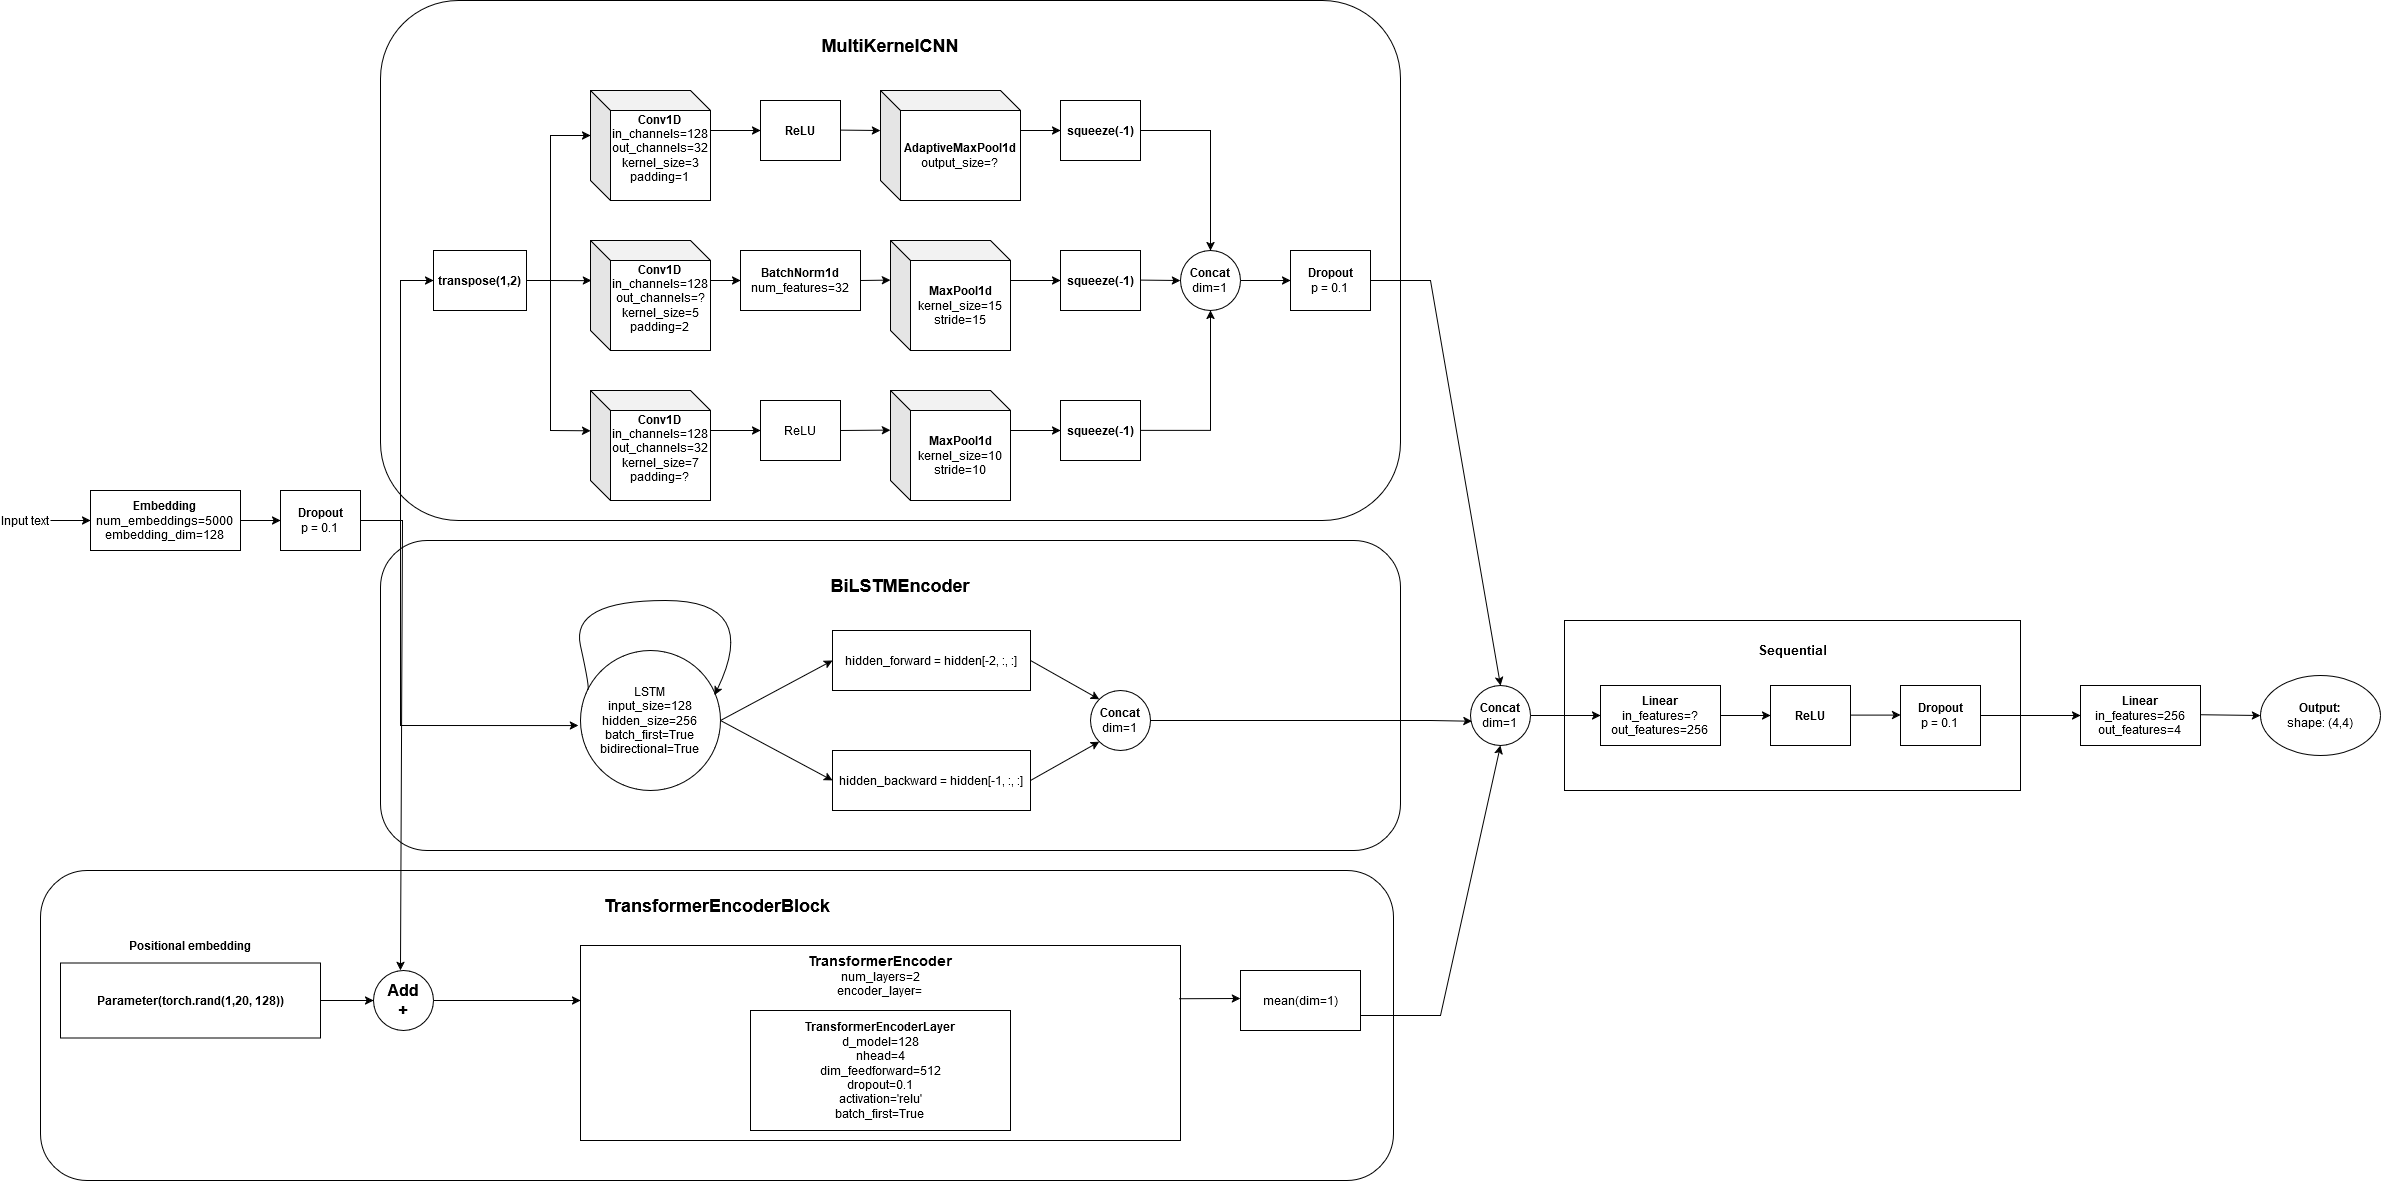

#### Define the TransformerEncoderBlock class

In [ ]:
class TransformerEncoderBlock(nn.Module):
    """
    A small TransformerEncoder (PyTorch built-in) for text.
    We add a learned positional embedding or can do sinusoidal.
    """
    def __init__(self):
        super().__init__()
        # ADD YOUR CODE HERE
        self.transformer_layer=nn.TransformerEncoderLayer(d_model=128, nhead=4, dim_feedforward=512, dropout=0.1, activation='relu',batch_first=True)
        self.transformer=nn.TransformerEncoder(self.transformer_layer, num_layers=2)

    def forward(self, x):
        # ADD YOUR CODE HERE
        x1=torch.randn(1, 20, 128)
        x=x+x1

        x=self.transformer(x)
        print(f"After transformer: {x.shape}")
        x=x.mean(dim=1)
        print(f"After mean: {x.shape}")

        return x

transformer=TransformerEncoderBlock()
transformer_output=transformer(input_tokens)

After transformer: torch.Size([4, 20, 128])
After mean: torch.Size([4, 128])


#### Enhance the TextClassifier model with the TransformerEncoderBlock to create the ComplexTextClassifier model

In [ ]:
class ComplexTextClassifier(nn.Module):
    def __init__(self):
        # ADD YOUR CODE HERE
        super().__init__()
        self.multi_kernel=MultiKernelCNN()
        self.bilstm_encoder=BiLSTMEncoder()
        self.dropout=nn.Dropout(0.1)

        self.linear1=nn.Linear(in_features=736, out_features=256)
        self.relu=nn.ReLU()

        self.linear2=nn.Linear(in_features=256, out_features=4)
        self.transformer=TransformerEncoderBlock()

    def forward(self, x):
        # ADD YOUR CODE HERE
        print(f"Input: {x.shape}")
        x1=self.multi_kernel(x)
        x2=self.bilstm_encoder(x)
        x3=self.transformer(x)
        x=torch.cat([x1,x2,x3], dim=1)
        print(f"Before Sequential concat: {x.shape}")
        x=self.linear1(x)
        print(f"Sequential Output: {x.shape}")
        x=self.relu(x)
        x=self.dropout(x)
        x=self.linear2(x)

        print(f"Final Output: {x.shape}")

        return x

#### Test your implementation

In [ ]:
#DO NOT MODIFY THIS CELL

print("ComplexTextClassifier:")
complex_text_classifier = ComplexTextClassifier()
text_embedding = complex_text_classifier(input_tokens)

try:
    assert text_embedding.shape == (4, 4), "Classification output shape is incorrect."
    print("\n🎉 Congratulations! Your implementation is correct. You passed the requirements for the +1 grade! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")

ComplexTextClassifier:
Input: torch.Size([4, 20, 128])
After transpose: torch.Size([4, 128, 20])
After conv1: torch.Size([4, 32, 20])
After pool1: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv2: torch.Size([4, 32, 20])
After pool2: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After conv3: torch.Size([4, 32, 18])
After pool3: torch.Size([4, 32, 1])
After squeeze: torch.Size([4, 32])
After concat: torch.Size([4, 96])
After dropout: torch.Size([4, 96])
After bilstm: torch.Size([4, 20, 128])
After concat: torch.Size([4, 512])
After transformer: torch.Size([4, 20, 128])
After mean: torch.Size([4, 128])
Before Sequential concat: torch.Size([4, 736])
Sequential Output: torch.Size([4, 256])
Final Output: torch.Size([4, 4])

🎉 Congratulations! Your implementation is correct. You passed the requirements for the +1 grade! 🎉
